# Frequentist Inference Case Study - Part B (Solving few problems on hospital charges):

## Introduction

In the previous notebook (Part-A), we carried out a brief discussion on the concepts of Frequentist inference using a known normal distribution, and wrote few Python codes using built-in methods from SciPy. Now, in this second part, we'll work on real data answering few relevant real-world business problems.

## Hospital medical charges

Let us imagine that a hospital has hired you as a Data scientist. An administrator is working on the hospital's business operations plan and needs you to help in answering few business questions. So, in this notebook, you're going to use Frequentist statistical inference on the available data sample to answer the following two questions:

* **Assignment-1 : Has the hospital's revenue stream fallen below a key threshold?** 
* **Assignment-2: Are patients with insurance really charged different amounts than those without insurance?**

The data, that we are going to use here (on medical charges) can be obtained from [Kaggle](https://www.kaggle.com/easonlai/sample-insurance-claim-prediction-dataset). 

For the purposes of this exercise, let us assume the observations are the result of random sampling from our single hospital. If we recall, in the Part-A, we introduced the **Central Limit Theorem (CLT), and its consequence that the distributions of sample statistics approach a normal distribution as $n$ increases**. The amazing thing about CLT is that, it applies to the sampling distributions of statistics that have been calculated from even highly non-normal distributions of data! Also, the hypothesis testing is very much based on making inferences about such sample statistics. You're going to rely heavily on the CLT to apply frequentist (parametric) tests to answer the questions in this notebook.

### Import libraies and dataset

In [1]:
import pandas as pd
import numpy as np
import math 
import matplotlib.pyplot as plt
import scipy
from scipy.stats import t
from numpy.random import seed

# Notebook was downloaded from Kaggle a stored in the current folder
medical = pd.read_csv('data_with_and_without_insurance.csv')

In [2]:
medical.shape

(1338, 8)

In [3]:
medical.head()

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
0,19,0,27.900,0,1,3,16884.92400,1
1,18,1,33.770,1,0,2,1725.55230,1
2,28,1,33.000,3,0,2,4449.46200,0
3,33,1,22.705,0,0,1,21984.47061,0
4,32,1,28.880,0,0,1,3866.85520,1


In [4]:
# Let us remove the extra decimals from charges column, and keep only upto two places after decimal
medical['charges'] = round(medical['charges'], 2)

In [5]:
medical.head()

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
0,19,0,27.900,0,1,3,16884.92,1
1,18,1,33.770,1,0,2,1725.55,1
2,28,1,33.000,3,0,2,4449.46,0
3,33,1,22.705,0,0,1,21984.47,0
4,32,1,28.880,0,0,1,3866.86,1


**Q1: Plot the histogram of charges.**

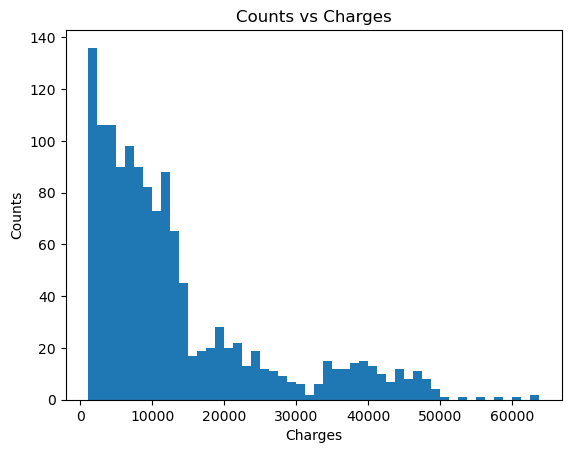

In [6]:
# let us make a histogram of the charges column
plt.hist(medical['charges'], bins = 50)
plt.xlabel('Charges')
plt.ylabel('Counts')
plt.title('Counts vs Charges')
plt.show()

 ## Assignment-1 :

__Q2:__ **The administrator is concerned that the actual average charge has fallen below 12,000,
threatening the hospital's operational model. On the assumption that these data represent
a random sample of charges, how would you justify that these data allow you to answer that 
question? And what would be the most appropriate frequentist test, of the ones discussed so far, to apply?**

**Ans:** Here we are going to use the 1-sample t-test, because the we are going to see the how extreme is the sample mean from population mean (12000). Though the sample size(1338) is >30, we are going to apply the t-test because the population size is assumed to be very large as compared to sample size. 

Now, let us carry out the normality test for the sample data.

In [7]:
scipy.stats.normaltest(medical['charges'])

NormaltestResult(statistic=np.float64(336.8851182821743), pvalue=np.float64(7.019821149768695e-74))

The sample doesn't follow a normal distibution. 

Though the sample doesn't follow a normal distribution, we assume the population does.So the given sample's distribution doesn't matter to apply frequentist inference. 

Our hypothesis for this assignment: <br>
H0: Average charge <= 12000 <br>
H1: Alterate Average charge > 12000

Here we are going to carry out the right-tailed one sample t-test with 95% confidence interval ie 5% significance level.

In [8]:
population_mean = 12000
sample_mean = round(np.mean(medical['charges']), 2)
sample_std = round(np.std(medical['charges'], ddof = 1), 2)
standard_error_of_means = sample_std/math.sqrt(len(medical['charges']))

print("The sample mean is:", sample_mean)
print("The sample std is:", sample_std)
print("The standard error of means:", standard_error_of_means)

The sample mean is: 13270.42
The sample std is: 12110.01
The standard error of means: 331.06742050653673


In [11]:
# Calculate the t-value corresponding to sample mean
t_value = (sample_mean - population_mean)/standard_error_of_means

print("The t-value corresponding to given sample's mean: ", t_value)

The t-value corresponding to given sample's mean:  3.8373452696017134


In [12]:
# calculate t-critical for 95% CI, right-tailed 
df = len(medical['charges']) - 1
t_critical_for_95_percent_CI = scipy.stats.t.ppf(0.95, df = df)
t_critical_for_95_percent_CI

np.float64(1.6459941145571317)

Here the calculated t-value is very large than crtitical t-value, that means the difference is significant, and we can argue against the null hypotheis, reject it and accept that the pouplation mean is more than 12000. 

## Assignment-2

**The administrator wants to know whether people with insurance really are charged a different amount to those without.**

__Q4:__ **State the null and alternative hypothesis here. Use the _t_-test for the difference between means, where the pooled standard deviation of the two groups is given by:**
\begin{equation}
s_p = \sqrt{\frac{(n_0 - 1)s^2_0 + (n_1 - 1)s^2_1}{n_0 + n_1 - 2}}
\end{equation}

**and the *t*-test statistic is then given by:**

\begin{equation}
t = \frac{\bar{x}_0 - \bar{x}_1}{s_p \sqrt{1/n_0 + 1/n_1}}.
\end{equation}

**What assumption about the variances of the two groups are we making here?**

__Ans:__ Here we'll assume the distribution of both populations are normal distributions, and the variances of both population are unknown and assumed to be equal. 

**Null hypothesis H0**: means of both samples are same i.e $ \bar{x}_0 $ = $ \bar{x}_1 $) <br>
**Alternate hypothesis H1:** The means of both samples are significantly different i.e $ \bar{x}_0  \neq  \bar{x}_1 $.

We'll take significance level of 5% for the this test i.e p = 0.025 

__Q5:__ **Perform this hypothesis test both manually, using the above formulae, and then using the appropriate function from [scipy.stats](https://docs.scipy.org/doc/scipy/reference/stats.html#statistical-tests) (hint, you're looking for a function to perform a _t_-test on two independent samples). For the manual approach, calculate the value of the test statistic and then its probability (the p-value). Verify you get the same results from both.**

__Ans:__ 

In [14]:
# Filter the charges with insurance claim
with_insurance = medical[medical['insuranceclaim'] == 1]['charges']
with_insurance.head()

0     16884.92
1      1725.55
4      3866.86
6      8240.59
10     2721.32
Name: charges, dtype: float64

In [15]:
scipy.stats.normaltest(with_insurance)

NormaltestResult(statistic=np.float64(99.05416314922842), pvalue=np.float64(3.095007939051119e-22))

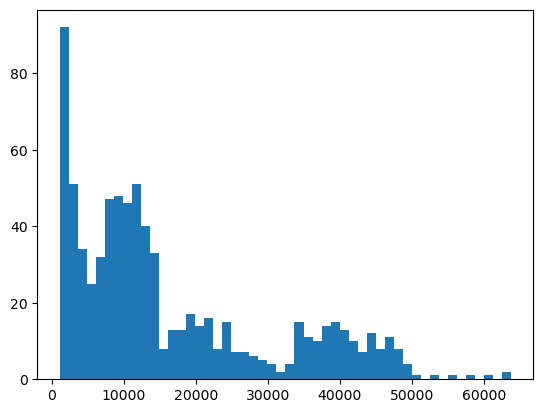

In [16]:
plt.hist(with_insurance, bins = 50)
plt.show()

In [17]:
# Filter the charges with insurance claim
without_insurance = medical[medical['insuranceclaim'] == 0]['charges'] 
without_insurance.head()

2     4449.46
3    21984.47
5     3756.62
7     7281.51
8     6406.41
Name: charges, dtype: float64

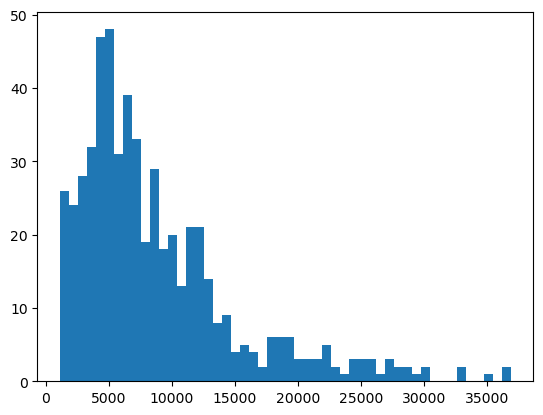

In [19]:
plt.hist(without_insurance, bins = 50)
plt.show()

In [20]:
scipy.stats.normaltest(without_insurance)

NormaltestResult(statistic=np.float64(173.38172910952682), pvalue=np.float64(2.242001467076413e-38))

In [21]:
# Size of the two samples 
n0, n1  = len(without_insurance), len(with_insurance)
n0, n1

(555, 783)

In [22]:
# Standard deviations of the both samples
s0, s1 = round(np.std(without_insurance, ddof = 1), 1),round(np.std(with_insurance, ddof = 1), 1)
s0, s1

(6446.5, 14045.9)

In [23]:
# Calculation of pooled standard devitaion(sp) of the both samples
import math
x = (((n0 - 1) * s0**2) + ((n1 - 1) * s1**2))/(n0 + n1 - 2)
sp = round(math.sqrt(x), 1)
sp

11520.0

In [24]:
# Means of the both samples 
x0_mean, x1_mean = round(np.mean(without_insurance), 1), round(np.mean(with_insurance), 1)
x0_mean, x1_mean

(np.float64(8821.4), np.float64(16423.9))

In [25]:
# t-value of the difference of the two samples means 
t = (x0_mean - x1_mean)/(sp * math.sqrt(1/n0 + 1/n1))
t

np.float64(-11.893324422642857)

In [26]:
# Calculation of total p-value
scipy.stats.t.cdf(t, n0+n1-2)*2

np.float64(4.4600036469674005e-31)

In [27]:
# Calculation of t-value and p-value using scipy.stats module, here df = n0+n1-2
import scipy
from scipy import stats
stats.ttest_ind(without_insurance, with_insurance, equal_var = True) 

TtestResult(statistic=np.float64(-11.89329894353943), pvalue=np.float64(4.461234451148428e-31), df=np.float64(1336.0))

**Yes, I obtained the same "t" and "p" values in both cases.**

Great! We got the exact same numerical results in both ways (using the formula and methods available in SciPy). Based on the results above, we can reject the null hypothesis and accept the alternate hypothesis that the means charges of both popultaions (i.e with and without insurance) are not same.

## Learning outcomes

Having completed this project notebook, you now have good hands-on experience:
* using the central limit theorem to help you apply frequentist techniques to answer questions that pertain to very non-normally distributed data from the real world
* performing inference using such data to answer business questions
* forming a hypothesis and framing the null and alternative hypotheses
* testing this using a _t_-test